<a href="https://colab.research.google.com/github/oliver2901/quantum-assignment/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introductory Quantum Mechanics / Structured Programming Coursework

- **This coursework is worth 10% of your final mark for PX2132 and 25% of your final mark for PX2134.**
- **The deadline for submitting this work is Friday 2pm Week 7 (19th November).**
- **Please upload your Jupyter notebook via turnitin to the PX2132 assignment, and via PX2134's GitHub classroom.**
- **Upload a .pdf version of your work via turnitin to the PX2134 assignment**.
- Your submitted work must abide by university regulations regarding plagiarism. You are encouraged to discuss the work with your classmates, but your submitted work must be written by you alone. You are welcome to copy and paste code from online sources, but you must cite your sources.
- You **have** to use functions, define them properly with sensible signatures, and include detailed comments throughout your code.

## 1 Time evolution of infinite potential well states
In PX2132 lecture 2 we met the infinite potential well defined by the potential

$$
  V(x) =
    \begin{cases}
      0 & -L/2<x<L/2\\
      \infty & \text{otherwise.}
    \end{cases} \tag{1}
$$

Although you do not need to show it here, from lecture 3 you should be able to show that the energy eigenvalues $E_n$ and eigenfunctions $\psi_n(x, t)$ are:


\begin{align*}
  \psi_n(x,t)&=
    \begin{cases}
      \sqrt\frac{2}{L}\cos\left(\frac{n\pi x}{L}\right)\exp(iE_n t / \hbar) & n\,\text{odd}\\
      \sqrt\frac{2}{L}\sin\left(\frac{n\pi x}{L}\right)\exp(iE_n t / \hbar) & n\,\text{even}
    \end{cases}\tag{2}\\
E_n&=\frac{\hbar^2n^2\pi^2}{2mL^2.}\tag{3}
\end{align*}


For simplicity let's choose units such that

$$
\hbar=m=L=1.\tag{4}
$$

These solutions are defined for continuous values of $x$. For subsequent questions, on the computer you will need to discretize space into a finite number of poistions, $N$. Something like $N=1000$ should give nice results in a reasonable time, but leave $N$ as a specified variable in your code.

**Q.1.1 [1 mark]** How many energy eigenstates must there be in this numerical problem?

*** As the value of n is not limited by any parameter, it can be assumed there is an infinite number of energy eigenstates**

**Q1.2 [3 marks]** Plot the real parts of the first 3 energy eigenstates at time $t=0$. Offset them along the y-axis by their respective energies.

In [32]:
import numpy as np
from numpy import e
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.animation import FuncAnimation
from IPython import display

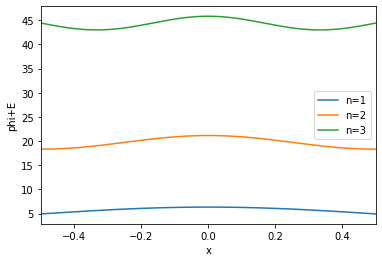

In [12]:
x=np.linspace(-0.5,0.5,1000)

p1=np.sqrt(2)*np.cos(np.pi*x)+np.pi**2/2
p2=np.sqrt(2)*np.cos(2*np.pi*x)+4*np.pi**2/2
p3=np.sqrt(2)*np.cos(3*np.pi*x)+9*np.pi**2/2

plt.plot(x,p1,label="n=1")
plt.plot(x,p2,label="n=2")
plt.plot(x,p3,label="n=3")

plt.xlim(-0.5,0.5)
plt.xlabel("x")
plt.ylabel("phi+E")
plt.legend()

**Q1.3 [4 marks]** Create an animation for the first 3 energy eigenstate wavefunctions. Show the full complex behaviour using axes $x, \text{Real}(\psi_n(x,t)), \text{Imag}(\psi_n(x,t))$. Let your animation run over 10 periods of the $\psi_1$ oscillation.

In [87]:
a=complex(0,1)

def phi(x,t,n):
  if n%2==0:
    yn=np.sqrt(2)*np.cos(n*np.pi*x)*e**(a*n**2*np.pi**2*t/2)
  else:
    yn=np.sqrt(2)*np.sin(n*np.pi*x)*e**(a*n**2*np.pi**2*t/2)
  return yn



(<mpl_toolkits.mplot3d.art3d.Line3D at 0x7faf67ecf810>,
 <mpl_toolkits.mplot3d.art3d.Line3D at 0x7faf67d6f090>)

ValueError: ignored

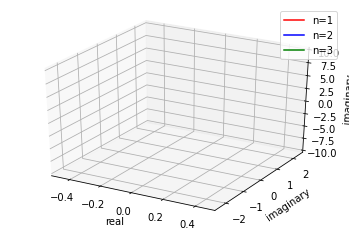

In [93]:
# Creating an empty figure
fig = plt.figure()
ax = plt.axes(projection="3d")

# issue with phi_n.real and phi_n.imag in the three lines below
# Initialisation of the plot element `line` as empty:
line1, = ax.plot3D(xs=[], ys=[], zs=[], label='n=1',color='red')
line2, = ax.plot3D(xs=[], ys=[], zs=[], label='n=2',color='blue')
line3, = ax.plot3D(xs=[], ys=[], zs=[], label='n=3',color='green')

# Setting axes 
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-2.5,2.5)
ax.set_zlim(-10,10)

#adding labels
plt.xlabel("real")
plt.ylabel("imaginary")
ax.set_zlabel("imaginary")
plt.legend()

def animate(frame_num):
    
    T=1/(np.pi**2/2)

    t_array=np.linspace(0,10*T,frame_num)
# Phi tries to take t_array which requires frame_num to be specified but it is specified by the function input, causing issue as phi also takes x which has a length of 1000. This means phi cant be generated thus the rest of the code doesnt work
    """phi_1=phi(x,t_array, 1)
    phi_2=phi(x,t_array, 2)
    phi_3=phi(x,t_array, 3)
    
    z1=(phi_1.real,phi_1.imag)
    z2=(phi_2.real,phi_2.imag)
    z3=(phi_3.real,phi_3.imag)

    line1.set_data_3d(x,phi_1.real,phi_1.imag)
    line2.set_data_3d(x,phi_2.real,phi_2.imag)
    line3.set_data_3d(x,phi_3.real,phi_3.imag)
    
    return line1, line2, line3

#setting animation, frames and frame interval
anim=FuncAnimation(fig,animate,frames=1000, interval=50)

# generating display
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()"""

CalledProcessError: ignored

**Q1.4 [1 mark]** Explain why the probability densities $\rho_n$ of the energy eigenstates, $\rho_n(x)=|\psi_n(x,t)|^2$, are time independent.

**Q1.5** In PX2132 lecture 4 we saw that any wavefunction matching the boundary conditions can be written as a sum of energy eigenstates. Consider the normalized top hat function

$$
  f(x)=
    \begin{cases}
      \alpha^{-1/2},& x_0-\frac{\alpha}{2}\leq x \leq x_0+\frac{\alpha}{2}\\
      0,& \text{otherwise.}\tag{5}\label{eq:tophat}
    \end{cases}
$$

Although you do not need to show it here, by the reasoning in Lecture 4 you should be able to show that the subsequent time evolution of this state is

$$
    f(x,t)=\sum^{\infty}_{n=1}f_n\psi_n(x,t)\tag{6}\label{eq:tophat_fourier}
$$

where

$$
  f_n=
    \begin{cases}
      \sqrt\frac{8L}{\alpha}\frac{1}{n\pi}\cos\left(\frac{n\pi x_0}{L}\right)\sin\left(\frac{n\pi \alpha}{2L}\right),& n\,\text{odd}\\
      \sqrt\frac{8L}{L\alpha}\frac{1}{n\pi}\sin\left(\frac{n\pi x_0}{L}\right)\sin\left(\frac{n\pi \alpha}{2L}\right),& n\,\text{even.}
    \end{cases}\tag{7}
$$

**(i) [2 marks]** What limits are imposed on $x_0$ and $\alpha$ by the boundary conditions?


**(ii) [1 mark]** Eq (6) is an analytic (rather than numerical) result. With $N$ positions in your numerical code, how many terms will there be in the numerical sum?

**(iii) [3 marks]** Animate $|f(x,t)|^2$ to see the subsequent time evolution, for a few values of $x_0$ and $\alpha$.

**(iv) [2 marks]** By plotting $f(x,t=0)$ for a few values of $N$, on the same axes, find the smallest value which you think gives a decent approximation to the top hat function of Eq. [5](#mjx-eqn-eq:tophat).

**(v) [3 marks]** 

At time $t=0$ you know the wavefunction to be a top hat function with $x_0=L/4$ and $\alpha=0.01L$. The probability to find the particle in the region $L/4-0.01L<x<L/4+0.01L$ is therefore 1. Plot the probability of finding the particle in this region for subsequent times. Remember that the probability density $\rho_n$ is a density. As such, it needs to be integrated over the relevant range of positions to give the probability of finding the particle in that range.

## 2 Exact diagonalisation

In PX2132 lecture 4 we saw that the TISE for the finite potential well cannot be solved analytically. We can solve any problem in quantum mechanics using 'exact diagonalisation'. The TISE is an eigenvalue problem, and we can simply diagonalise the Hamiltonian to find the eigenvalues and eigenvectors.
The TISE reads

$$
\hat{H}\phi_n=E_n\phi_n \tag{8}
$$

or in 1D

$$
\left(-\frac{\hbar^2}{2m}\frac{\mathrm{d}^2}{\mathrm{d}x^2}+\hat{V} \right)\phi_n(x)=E_n\phi_n(x).\label{TISE1D}\tag{9}
$$

This time we will define a potential

$$
  V(x) =
    \begin{cases}
      0 & -L/2<x<L/2\\
      V_0 & \text{otherwise.}
    \end{cases}\label{potential}\tag{10}
$$

Let's again choose units such that

$$
\hbar=m=L=1.\tag{11}
$$

The wavefunctions will extend beyond the end of the well. On a computer $x$ will be discrete, taking $n$ values. Call these $x_i$, with $1\leq i \leq N$. Since $x$ is now a list of $N$ numbers it is reasonable to think of it as an $N\times 1$ vector:

$$
x=
 \begin{pmatrix}
  x_1 \\
  x_2 \\
  \vdots  \\
  x_n.
 \end{pmatrix}\tag{12}
$$


**Q2.1**
**(i) [1 mark]** Thinking about the solutions for the bound states in the finite potential well, what must go wrong with any numerical simulation at $x_1$ and $x_N$?

**(ii) [1 mark]** This is not too much of a problem provided we leave enough space between the ends of the well and $x_1$ and $x_N$. Why not?

**(iii) [1 mark]** Let's relabel $\phi_n(x_i)$ to $\phi_n^i$. Explain why it is reasonable to think of $\phi_n(x)$ as a $N\times 1$ vector for each $n$ separately.

**(iv) [1 mark]** With a finite $N$, Eq. [9](#mjx-eqn-TISE1D) is just a matrix eigenvalue problem. What are the dimensions of the object in parentheses?

**Q2.2** The second derivative of a function $\phi(x)$ can be approximated numerically using the formula

$$
\phi''(x)\approx\frac{\phi(x+h)-2\phi(x)+\phi(x-h)}{h^2}\label{secondd}\tag{13}
$$

where $h$ is the fixed spacing between neighbouring discrete positions $x_{i+1}$ and $x_i$.

**(i) [1 mark]** By Taylor expanding the right hand side of Eq. [13](#mjx-eqn-secondd) verify that this expression returns the second derivative in the limit $h\to0$.

**(ii) [2 marks]** By thinking of $\mathrm{d}^2/\mathrm{d}x^2$ as a matrix acting on the vector $\phi_n$, explain why, for sites $x_1<x<x_N$,

$$
\frac{\mathrm{d}^2\phi_n}{\mathrm{d}x^2} \approx \frac{1}{h^2}
 \begin{pmatrix}
    -2 & 1 & 0 & \cdots & 0 \\
    1 & -2 & 1 &  & 0 \\
    0 & 1 & -2 & \ddots & \vdots \\
    \vdots  & & \ddots & \ddots & 1  \\
    0 & 0 & \cdots & 1 & -2 
 \end{pmatrix}
  \begin{pmatrix}
    \phi_n^1 \\
    \phi_n^2 \\
    \phi_n^3 \\
    \vdots  \\
    \phi_n^N 
 \end{pmatrix}.\tag{14}
$$

**(iii) [1 mark]** What new problem arises at sites $x_1$ and $x_N$?

**(iv) [2 marks]** Explain why the matrix form of $\hat{V}$ should be diagonal.

**Q2.3** Putting this all together, we see that if we construct the matrix

$$
-\frac{\hbar^2}{2m}\frac{1}{h^2}
 \begin{pmatrix}
    -2 & 1 & 0 & \cdots & 0 \\
    1 & -2 & 1 &  & 0 \\
    0 & 1 & -2 \ddots & \vdots \\
    \vdots  & & \ddots & \ddots & 1  \\
    0 & 0 & \cdots & 1 & -2 
 \end{pmatrix}
 +
 \begin{pmatrix}
    V(x_1) & 0 & 0 & \cdots & 0 \\
    0 & V(x_2) & 1 &  & 0 \\
    \vdots & 0 & V(x_3) & \ddots & \vdots \\
    \vdots  & & \ddots & \ddots & 0  \\
    0 & 0 & \cdots & 0 & V(x_N) 
 \end{pmatrix}\tag{15}
$$

its eigenvalues must be $E_n$ and its normalised eigenvectors must be $\phi_n(x)$. You can use the python code:

In [ ]:
H = [[1,0],[0,1]]
E, phi = np.linalg.eigh(H)

to diagonalise the matrix $H$ (here the identity matrix as a placeholder) to give its eigenvalues and normalised eigenvectors. Note that from the [documentation for np.linalg.eigh](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html):
```
The column phi[:, i] is the normalized eigenvector corresponding to the eigenvalue E[i]
```
**(i) [5 marks]** Set $V_0=100$ in [10](#mjx-eqn-potential). Plot $V(x)$ and the real part of $\phi_n(x)$ for the lowest three energy eigenstates. Offset the $\phi_n(x)$ vertically by their energies. Note: now that the well is finite, make sure you use a wide enough range of values for $x$.

**(ii) [2 marks]** Now set $V_0=20$. What happened to $\phi_3(x)$?

**Q2.4 [3 marks]** Your code should give the energy eigenvalues and eigenstates of any potential you care to specify. Play around with it and give an interesting example of your choice here.

**Bonus question** (only do this if you're interested; no points attached).
Since you have the energy eigenstates for any potential, it is possible to numerically calculate the time evolultion of any chosen initial state. See if you can code this up. It will be a useful program for the rest of your physics career!